## Radiology 229 - Class 9 Exercises (Lectures 8A,8B)

This class notebook is built (in part) from the Matlab folder, Lecture8.mlx. 

Objectives:
1) Basic spin-echo simulations
2) Understanding coherence pathway diagrams
3) Simulation of CPMG sequences


First we import basic libraries including  <code>mrsigpy</code>.


In [1]:
# -- We use the functions in mrsigpy, as well as standard numpy and matpltlib
import numpy as np
import mrsigpy as mrs
import matplotlib.pyplot as plt
#from PIL import Image


# Initial Example - Basic spin echo using EPG

Here we simulate a $90_y^\circ$ followed by $180_x^\circ$ for a spin echo sequence.

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [ 6.12323400e-17,  6.12323400e-17,  6.12323400e-17,
         6.12323400e-17,  6.12323400e-17,  6.12323400e-17,
         6.12323400e-17,  6.12323400e-17,  6.12323400e-17,
         6.12323400e-17,  6.12323400e-17,  6.12323400e-17,
         6.12323400e-17,  6.12323400e-17,  6.12323400e-17,
         6.12323400e-17,  6.12323400e-17,  6.12323400e-17,
         6.12323400e-17],
       [-8.13893638e-17, -1.19519085e-16, -1.51332533e-16,
        -1.73382227e-16, -1.83278741e-16, -1.79949633e-16,
        -1.63755665e-16, -1.36451703e-16, -1.00996557e-16,
        -6.12323400e-17, -2.14681234e-17,  1.39870233e-17,
    

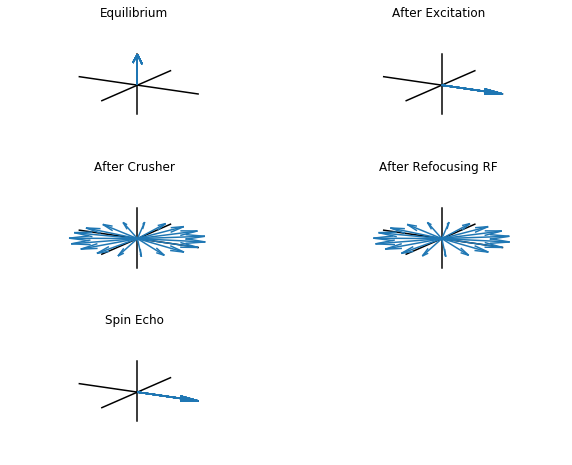

In [2]:
#
# Simulate a simple 90-gradient-RF-gradient to a spin echo, using EPG

refoc_angle = 180
fig = plt.figure(figsize=(10,8))	    # Note (width,height)

Q = mrs.epg_m0()                # Start at equilibrium
figax = fig.add_subplot(3,2,1, projection='3d')
figax.title.set_text("Equilibrium")
mrs.epg_showstate(figax,Q,0,19,0)

Q = mrs.epg_rf(Q,90,90)         # Flip 90 about y
figax = fig.add_subplot(3,2,2, projection='3d')
figax.title.set_text("After Excitation")
mrs.epg_showstate(figax,Q,0,19,0)

Q = mrs.epg_grad(Q)
figax = fig.add_subplot(3,2,3, projection='3d')
figax.title.set_text("After Crusher")
mrs.epg_showstate(figax,Q,0,19,0)

Q = mrs.epg_rf(Q,refoc_angle,0)   # Flip 180 about x
figax = fig.add_subplot(3,2,4, projection='3d')
figax.title.set_text("After Refocusing RF")
mrs.epg_showstate(figax,Q,0,19,0)


Q = mrs.epg_grad(Q)
figax = fig.add_subplot(3,2,5, projection='3d')
figax.title.set_text("Spin Echo")
mrs.epg_showstate(figax,Q,0,19,0)



# Lecture Example of 2 echoes with/without CPMG

This is to demonstrate, numerically, that this works!  As an exercise,
1. Change the excitation phase so the Non-CPMG condition is met
1. Try a $90_y^\circ$,$120_y^\circ$,$120_y^\circ$ vs $90_y^\circ$,$-120_y^\circ$,$120_y^\circ$
1. Experiment with the refocusing flip angle



After Excitation, Q0
0.00+1.00j
0.00-1.00j
0.00+0.00j

After Gradient, Q1
0.00-0.00j 0.00+1.00j
0.00+0.00j 0.00+0.00j
0.00+0.00j 0.00+0.00j

After 1st Refocusing RF, Q2
0.00-0.00j 0.00+0.25j
0.00+0.00j 0.00+0.75j
-0.00+0.00j 0.43-0.00j

After Gradient, Q3
0.00-0.75j 0.00-0.00j 0.00+0.25j
0.00+0.75j 0.00+0.00j 0.00+0.00j
-0.00+0.00j 0.43-0.00j 0.00+0.00j

After Gradient, Q4
0.00-0.00j 0.00-0.75j 0.00-0.00j 0.00+0.25j
0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j
-0.00+0.00j 0.43-0.00j 0.00+0.00j 0.00+0.00j

After 2nd Refocusing RF, Q5
0.00+0.00j -0.00-0.56j 0.00-0.00j 0.00+0.06j
0.00-0.00j 0.00-0.19j 0.00-0.00j 0.00+0.19j
0.00+0.00j -0.54-0.00j -0.00+0.00j 0.11-0.00j

Spin Echo, Q6
0.00+0.19j 0.00+0.00j -0.00-0.56j 0.00-0.00j 0.00+0.06j
0.00-0.19j 0.00-0.00j 0.00+0.19j 0.00+0.00j 0.00+0.00j
0.00+0.00j -0.54-0.00j -0.00+0.00j 0.11-0.00j 0.00+0.00j


array([[ 8.33740064e-02,  2.56701596e-01,  3.84006347e-01,
         3.38182997e-01,  8.20166882e-02, -2.30803177e-01,
        -3.89397742e-01, -3.33778388e-01, -1.69742251e-01,
         1.22464680e-16,  1.69742251e-01,  3.33778388e-01,
         3.89397742e-01,  2.30803177e-01, -8.20166882e-02,
        -3.38182997e-01, -3.84006347e-01, -2.56701596e-01,
        -8.33740064e-02],
       [-4.72541649e-01, -2.47817083e-01,  1.87786928e-01,
         6.90299970e-01,  9.86384555e-01,  8.81289573e-01,
         4.46441470e-01, -5.15812248e-02, -3.89012539e-01,
        -5.00000000e-01, -3.89012539e-01, -5.15812248e-02,
         4.46441470e-01,  8.81289573e-01,  9.86384555e-01,
         6.90299970e-01,  1.87786928e-01, -2.47817083e-01,
        -4.72541649e-01],
       [ 8.77355780e-01,  9.34179310e-01,  9.04032740e-01,
         6.39623493e-01,  1.42543931e-01, -4.12381597e-01,
        -8.05642236e-01, -9.41239271e-01, -9.05459448e-01,
        -8.66025404e-01, -9.05459448e-01, -9.41239271e-01,
    

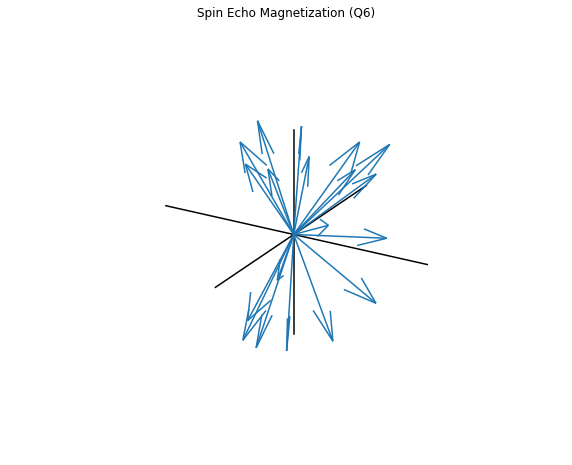

In [3]:
# CPMG / Non-CPMG Example from Lecture 08B

# -- Change these for exercise:
excite_phase = 180
refoc_angle = 120

Q = mrs.epg_m0()                        # Start at equilibrium
Q = mrs.epg_rf(Q,90,excite_phase)         # Flip 90
mrs.show_matrix(Q,"After Excitation, Q0")

Q = mrs.epg_grad(Q)
mrs.show_matrix(Q,"After Gradient, Q1")

Q = mrs.epg_rf(Q,refoc_angle,0)         # Refocus 
mrs.show_matrix(Q,"After 1st Refocusing RF, Q2")

Q = mrs.epg_grad(Q)
mrs.show_matrix(Q,"After Gradient, Q3")

Q = mrs.epg_grad(Q)
mrs.show_matrix(Q,"After Gradient, Q4")

Q = mrs.epg_rf(Q,refoc_angle,0)         # Refocus 
mrs.show_matrix(Q,"After 2nd Refocusing RF, Q5")

Q = mrs.epg_grad(Q)
mrs.show_matrix(Q,"Spin Echo, Q6")

fig = plt.figure(figsize=(10,8))	    # Note (width,height)
figax = fig.add_subplot(1,1,1, projection='3d')
figax.title.set_text("Spin Echo Magnetization (Q6)")
mrs.epg_showstate(figax,Q,0,19,0)


# Example:  epg_cpmg

This is a powerful function that is designed to help you simulate spin-echo trains.  The python code may need a bit of debugging, but you will see the signal plot, and an attempt at a coherence pathway diagram.


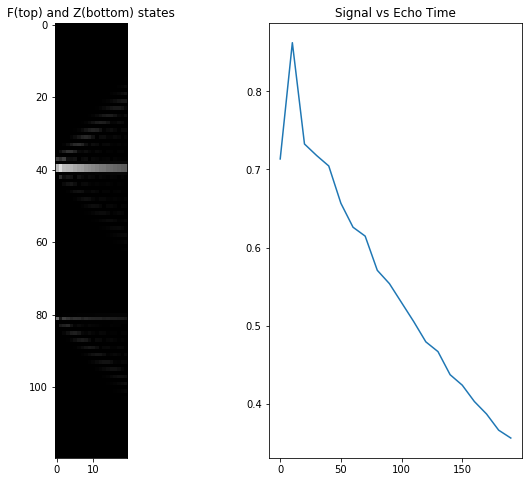

In [4]:
# Try out epg_cpmg

etl=20
rflip = 120
rflip1 = 90+(180-rflip)         # First refocusing flip
flips = np.ones(etl)*rflip
#flips[0] = rflip1

sig = mrs.epg_cpmg(flips)

# Exercises

1. Try to reduce the refocusing angle from 180$^\circ$ to 120$^\circ$
1. Try to remove the starting "prep" refocusing pulse
1. Try to flatten the echo train by ramping the refocusing angle (harder!)

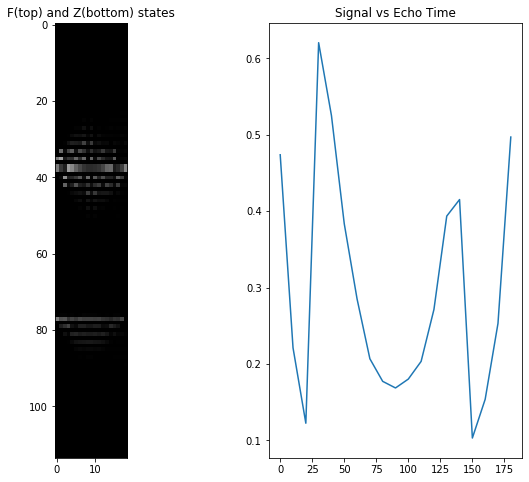

In [5]:
# Try a Hyperecho

halflen = 9
rf = 150 * np.random.rand(halflen) + 150j*np.random.rand(halflen)
rf2 = -np.flip(rf).conjugate()
rf = np.append(rf,180)
rf = np.append(rf,rf2)

rfquiz = np.array((90,120j,60,180j,-60,120j,-90))  # Example from Quiz.


sig = mrs.epg_cpmg(rf)
